In [17]:
import numpy as np
import pandas as pd
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from analysis.utils import optimise_model, plot_variable_importance, recursive_feature_elimination, load_model, save_model

In [18]:
df = pd.read_csv('../data/df_simple_model.csv', index_col=0)
results = pd.DataFrame(index=df.index)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15747 entries, 5 to 18334
Columns: 1447 entries, Age to PositionCategory_Sturm
dtypes: float64(5), int64(1442)
memory usage: 174.0 MB


In [12]:
y = df["Value"]
X = df.drop("Value", axis = 1)

# RandomForest

In [13]:
%%timeit -r 1 -n 1

param_dist = {
    'n_estimators': randint(50, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['friedman_mse', 'absolute_error']
}

rf_optimized, cv_results = optimise_model(RandomForestRegressor(), param_dist, X, y, n_iter=1)

save_model(rf_optimized, 'simple-model-rf')

cv_results

UsageError: Line magic function `%%timeit` not found.


In [14]:
rf_optimized = load_model('simple_model-rf')
plot_variable_importance(rf_optimized, X, n=15)

FileNotFoundError: [Errno 2] No such file or directory: '../models/simple_model-rf.pkl'

In [15]:
results['PredictedValueSimpleModelRF'] = rf_optimized.predict(X)

NameError: name 'rf_optimized' is not defined

# XGBoost

In [16]:
%%timeit -r 1 -n 1

param_dist = {
    "learning_rate": uniform(0.01, 0.5),
    "max_depth": randint(1, 10),
    "n_estimators": randint(50, 500),
    "gamma": uniform(0, 5),
    "subsample": uniform(0.1, 0.9),
    "colsample_bytree": uniform(0.1, 0.9),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}

xgb_optimized, cv_results = optimise_model(XGBRegressor(), param_dist, X, y, n_iter=1)

save_model(xgb_optimized, 'simple-model-xgb')

cv_results

Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 

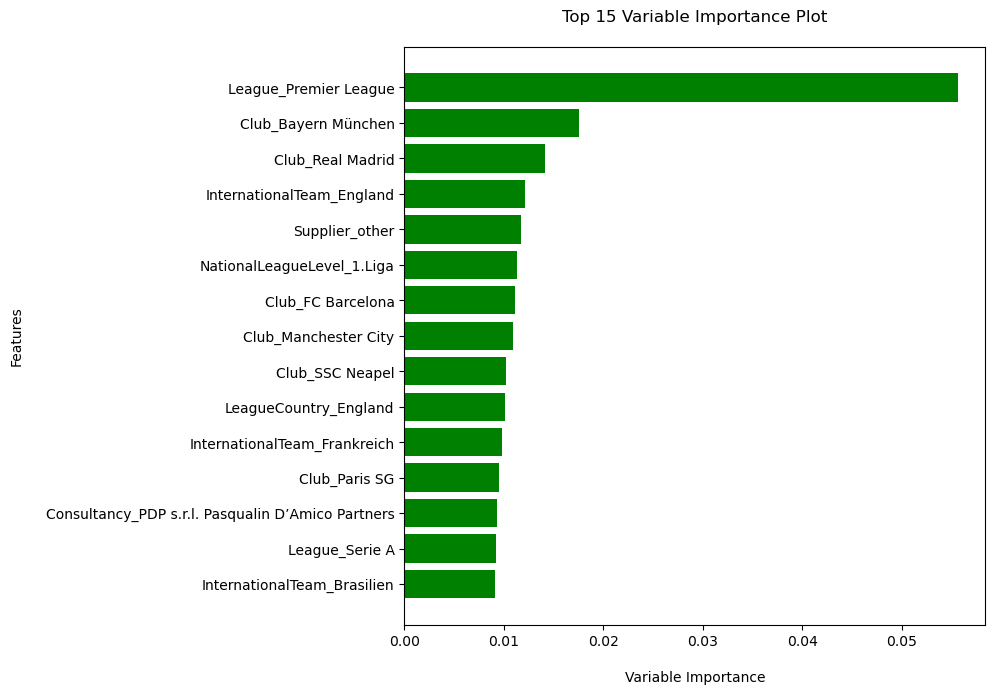

In [20]:
xgb_optimized = load_model('simple-model-xgb')
plot_variable_importance(xgb_optimized, X, n=15)

In [21]:
results['PredictedValueSimpleModelXGB'] = xgb_optimized.predict(X)

# Export Results

In [22]:
results.to_csv('../data/df_simple_model_results.csv')

# Recursive Feature Elimination

In [ ]:
%%timeit -r 1 -n 1

recursive_feature_elimination(rf_optimized, X, y)

In [ ]:
%%timeit -r 1 -n 1

recursive_feature_elimination(xgb_optimized, X, y)